In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta

plt.rcParams.update({'figure.max_open_warning': 0})
pd.options.mode.chained_assignment = None

In [2]:
input_file = '~/Repositories/covid-19-data/public/data/owid-covid-data.csv'

n = 16
group_one = ['USA', 'IND']
fig_size = (12, 4)
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania', 'South America']

today = datetime.today().strftime('%Y-%m-%d')
two_days = (datetime.today()-relativedelta(days=2)).strftime('%Y-%m-%d')
one_day = (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d')
one_month = (datetime.today()-relativedelta(months=1)).strftime('%Y-%m-%d')
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(months=12)).strftime('%Y-%m-%d')

last_day = two_days

graph_start_date = one_month

In [3]:
inp = pd.read_csv(input_file)

inp['new_tests_mean'] = inp['new_tests'].rolling(7).mean()
inp['new_cases_mean'] = inp['new_cases'].rolling(7).mean()
inp['new_deaths_mean'] = inp['new_deaths'].rolling(7).mean()
inp['new_vaccinations_mean'] = inp['new_vaccinations'].rolling(7).mean()

inp['new_tests_change_1w'] = inp['new_tests_mean'].pct_change(periods=6)*100
inp['new_cases_change_1w'] = inp['new_cases_mean'].pct_change(periods=6)*100
inp['new_deaths_change_1w'] = inp['new_deaths_mean'].pct_change(periods=6)*100
inp['new_vaccinations_change_1w'] = inp['new_vaccinations_mean'].pct_change(periods=6)*100

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['new_deaths_mean'].rolling(7).sum()/inp['new_cases_mean'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['new_cases_mean'].rolling(7).sum()/inp['new_tests_mean'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])

print(inp.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [4]:
top_n = inp[(inp['date'] == last_day) & ~inp['location'].isin(continents) & (inp['total_cases'] >= 1000000)].sort_values(
    'total_cases', ascending=False)['iso_code'].tolist()

if len(top_n) > n-1:
    top_n = top_n[0:n]
    
print(top_n)

['OWID_WRL', 'USA', 'IND', 'BRA', 'FRA', 'TUR', 'RUS', 'GBR', 'ITA', 'ESP', 'DEU', 'ARG', 'COL', 'POL', 'IRN', 'MEX']


In [5]:
df = inp[(inp['iso_code'].isin(top_n)) & (inp['date'] == last_day)][[
    'date', 'iso_code', 'population',
    'total_tests', 'total_cases', 'total_deaths', 'total_vaccinations',
    'new_tests_mean', 'new_cases_mean', 'new_deaths_mean', 'new_vaccinations_mean',
    'people_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'cfr', 'new_tests_change_1w', 'new_cases_change_1w', 'new_deaths_change_1w', 'new_vaccinations_change_1w']]

df['total_cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['total_deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)
df['new_cases_%_world'] = (df['new_cases_mean']*100)/int(df[df['iso_code'] == 'OWID_WRL']['new_cases_mean'])
df['new_deaths_%_world'] = (df['new_deaths_mean']*100)/int(df[df['iso_code'] == 'OWID_WRL']['new_deaths_mean'])

df.sort_values('total_cases', ascending=False).set_index('iso_code')

,date,population,total_tests,total_cases,total_deaths,total_vaccinations,new_tests_mean,new_cases_mean,new_deaths_mean,new_vaccinations_mean,...,new_tests_change_1w,new_cases_change_1w,new_deaths_change_1w,new_vaccinations_change_1w,total_cases_%_world,total_deaths_%_world,cases_1M_pop,deaths_1M_pop,new_cases_%_world,new_deaths_%_world
iso_code,,,,,,,,,,,,,,,,,,,,,
OWID_WRL,2021-04-28,7.794799e+09,NaN,149622864.0,3150675.0,1.088003e+09,NaN,825720.571429,13196.714286,1.874054e+07,...,0.000000,2.013336,7.463850,15.713610,100.000000,100.000000,19195,404,100.000069,100.005413
USA,2021-04-28,3.310026e+08,NaN,32230850.0,574340.0,2.346394e+08,NaN,52679.428571,683.571429,2.669644e+06,...,-23.752869,-14.974798,-3.528226,-9.418523,21.541394,18.229110,97373,1735,6.379817,5.180141
IND,2021-04-28,1.380004e+09,282703789.0,18376421.0,204832.0,1.470534e+08,1.664342e+06,349378.142857,2882.142857,NaN,...,8.865041,24.032574,59.966698,0.000000,12.281827,6.501210,13316,148,42.311939,21.841034
BRA,2021-04-28,2.125594e+08,NaN,14521289.0,398185.0,4.100366e+07,NaN,56927.714286,2387.142857,9.921456e+05,...,0.000000,-5.411449,-7.464836,-7.473410,9.705261,12.638085,68316,1873,6.894312,18.089897
FRA,2021-04-28,6.814769e+07,NaN,5626985.0,104077.0,2.096935e+07,NaN,27250.857143,290.142857,3.733699e+05,...,-3.932468,-13.615100,-2.869440,6.320386,3.760779,3.303324,82570,1527,3.300254,2.198718
TUR,2021-04-28,8.433907e+07,46718604.0,4751026.0,39398.0,2.213280e+07,2.842870e+05,43490.714286,346.142857,2.364454e+05,...,-10.059424,-26.540387,5.439513,28.932793,3.175334,1.250462,56332,467,5.267005,2.623089
RUS,2021-04-28,1.459345e+08,128854506.0,4732981.0,107547.0,1.904377e+07,2.874107e+05,8468.857143,372.857143,3.175006e+05,...,-3.137304,-1.375834,-1.916573,8.192428,3.163274,3.413459,32432,736,1.025633,2.825532
GBR,2021-04-28,6.788600e+07,151516625.0,4427390.0,127734.0,4.813801e+07,9.914867e+05,2331.714286,22.428571,5.268224e+05,...,-2.293862,-7.982862,-1.257862,5.167972,2.959033,4.054179,65218,1881,0.282386,0.169965
ITA,2021-04-28,6.046183e+07,57910906.0,3994894.0,120256.0,1.892062e+07,2.893793e+05,12856.428571,322.714286,3.628827e+05,...,-0.953957,-5.057549,-6.652893,7.095776,2.669976,3.816833,66072,1988,1.556996,2.445546


<AxesSubplot:title={'center':'World total vaccinations'}, xlabel='date'>

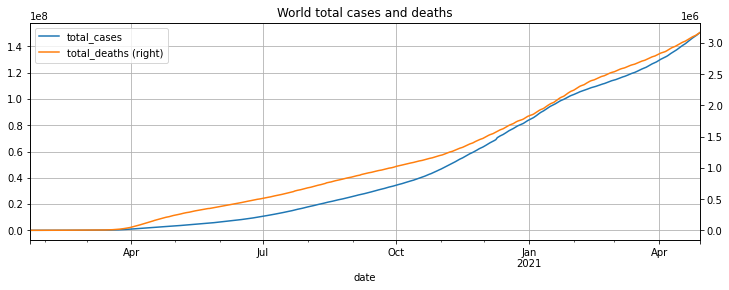

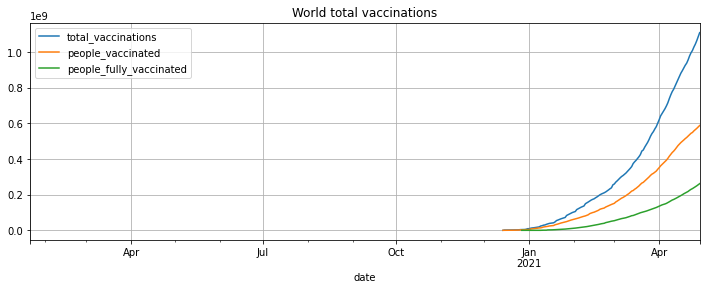

In [6]:
inp[(inp['iso_code'] == 'OWID_WRL')].plot(
    x='date', y=['total_cases', 'total_deaths'],
    secondary_y=['total_deaths'],
    style=['-', '-'], figsize=fig_size, grid=True, title='World total cases and deaths')

inp[(inp['iso_code'] == 'OWID_WRL')].plot(
    x='date', y=['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'],
    style=['-', '-', '-'], figsize=fig_size, grid=True, title='World total vaccinations')

<AxesSubplot:title={'center':'People vaccinated per hundred'}, xlabel='iso_code'>

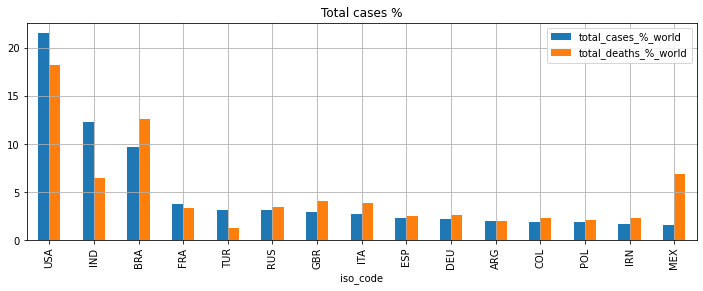

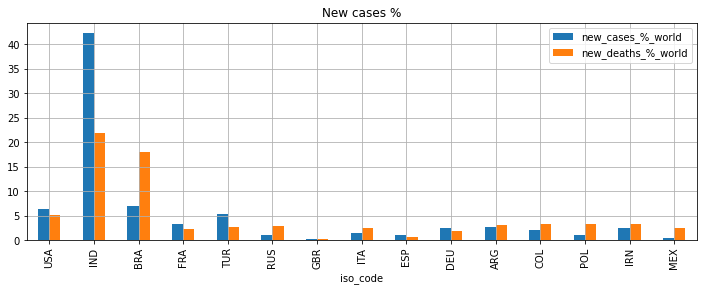

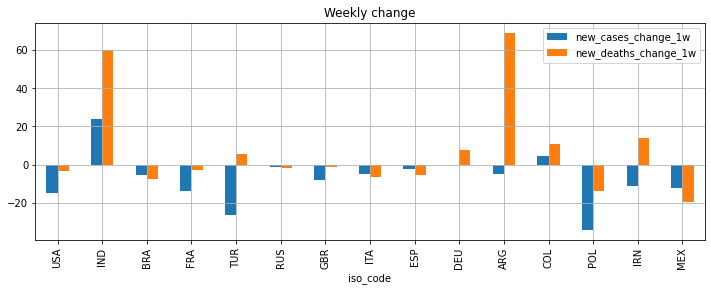

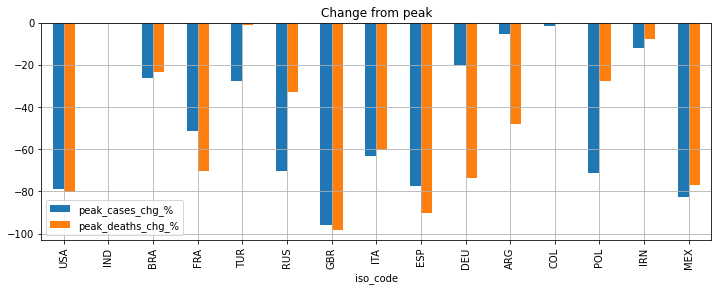

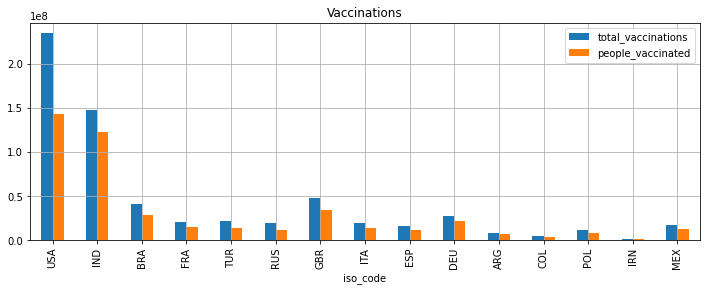

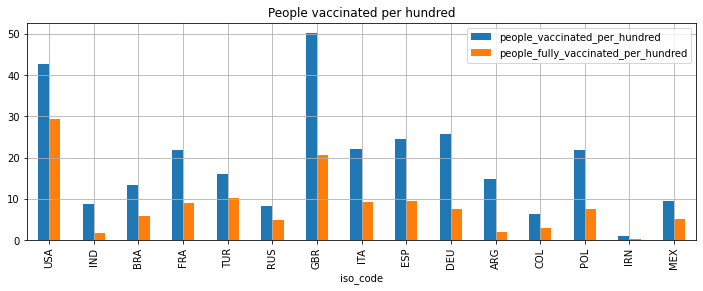

In [7]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_cases_%_world', 'total_deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='Total cases %')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['new_cases_%_world', 'new_deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='New cases %')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['new_cases_change_1w', 'new_deaths_change_1w'],
    kind='bar', figsize=fig_size, grid=True, title='Weekly change')

df_max = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] <= last_day)].groupby('iso_code')[['new_cases_mean', 'new_deaths_mean']].max()
df_last = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)][['iso_code', 'new_cases_mean', 'new_deaths_mean']].set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'new_cases_mean': 'peak_cases_chg_%','new_deaths_mean': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Change from peak')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_vaccinations', 'people_vaccinated'],
    kind='bar', figsize=fig_size, grid=True, title='Vaccinations')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'],
    kind='bar', figsize=fig_size, grid=True, title='People vaccinated per hundred')

<AxesSubplot:title={'center':'Top new vaccinations change'}, xlabel='iso_code'>

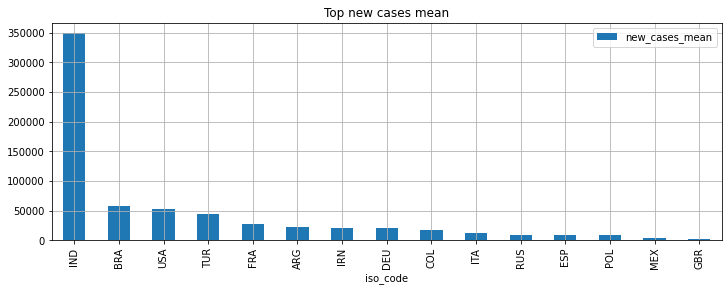

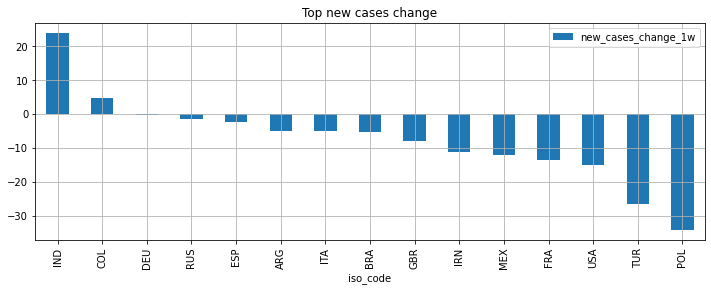

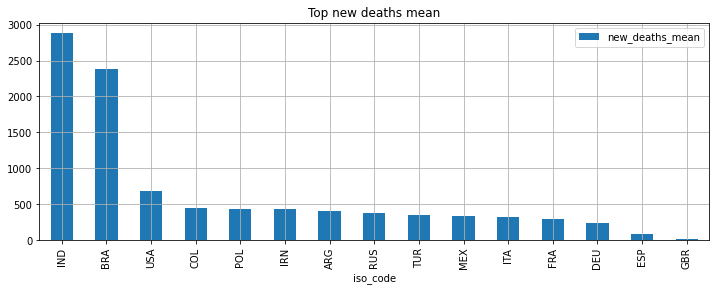

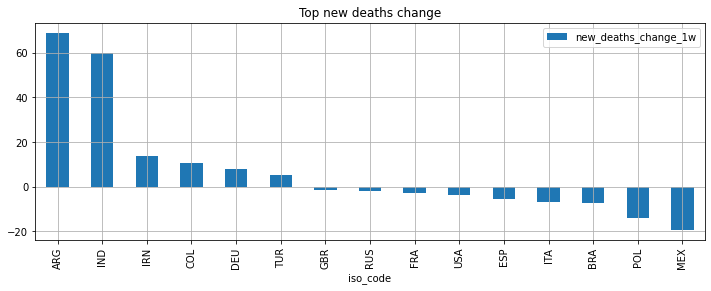

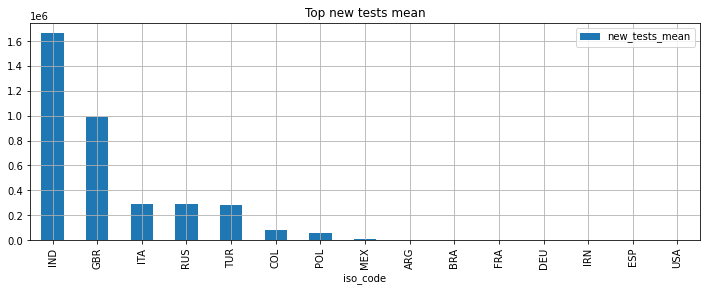

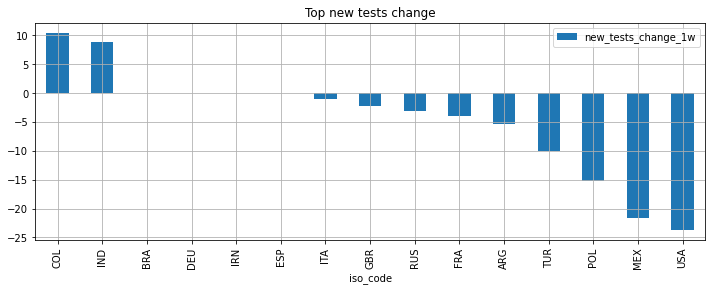

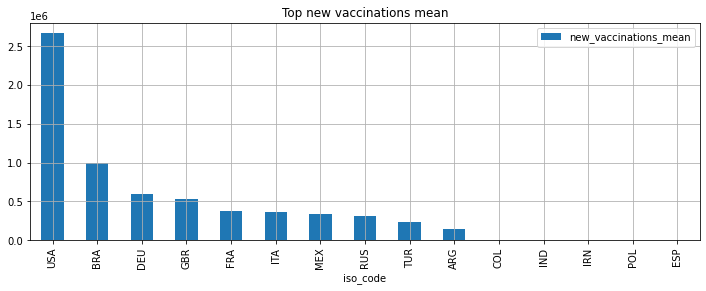

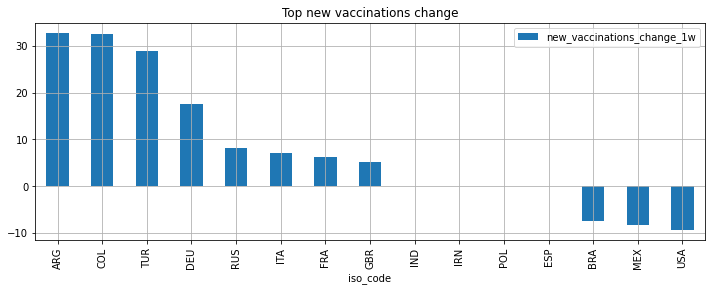

In [8]:
inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_cases_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_cases_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new cases mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_cases_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_cases_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new cases change')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_deaths_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_deaths_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new deaths mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_deaths_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new deaths change')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_tests_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_tests_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new tests mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_tests_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_tests_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new tests change')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_vaccinations_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_vaccinations_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new vaccinations mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_vaccinations_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_vaccinations_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new vaccinations change')

In [9]:
def plot_all(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code)].plot(
        x='date', y=['new_cases_mean', 'new_deaths_mean', 'hosp_patients'],
        secondary_y=['new_deaths_mean'],
        style=['-', '-', '--'], figsize=fig_size, grid=True, title=country+' (cases and deaths)')
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y=['new_cases_mean', 'new_deaths_mean', 'hosp_patients', 'new_cases', 'new_deaths'],
        secondary_y=['new_deaths_mean', 'new_deaths'],
        style=['-', '-', '--', 'o', 'o'], figsize=fig_size, grid=True, title=country+' (recent cases and deaths)')
    
    df[(df['iso_code'] == iso_code)].plot(
        x='date', y=['new_vaccinations_mean'],
        style=['-'], figsize=fig_size, grid=True, title=country+' (vaccinations)')
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y=['new_vaccinations_mean', 'new_vaccinations'],
        style=['-', 'o'], figsize=fig_size, grid=True, title=country+' (recent vaccinations)')
    
    df[(df['iso_code'] == iso_code)].plot(
        x='date', y=['new_tests_mean'],
        style=['-'], figsize=fig_size, grid=True, title=country+' (tests)')
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y=['new_tests_mean', 'new_tests'],
        style=['-', 'o'], figsize=fig_size, grid=True, title=country+' (recent tests)')

    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)

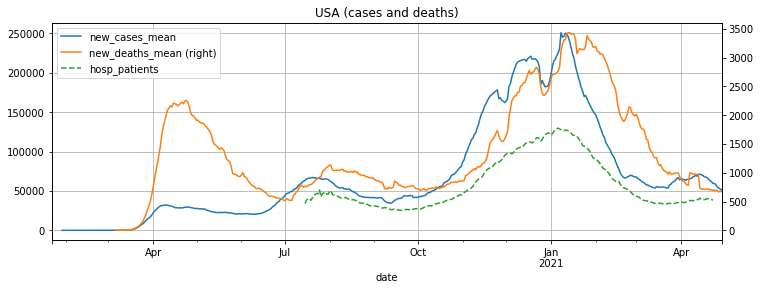

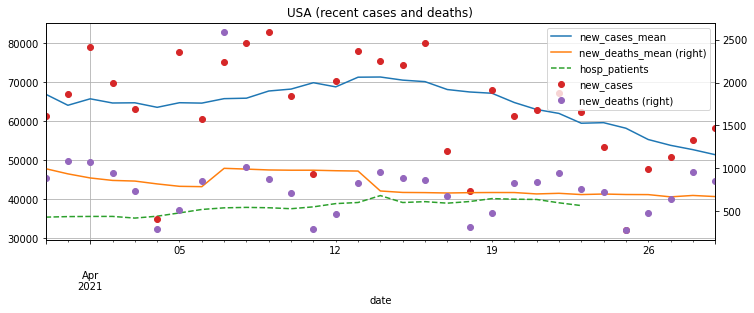

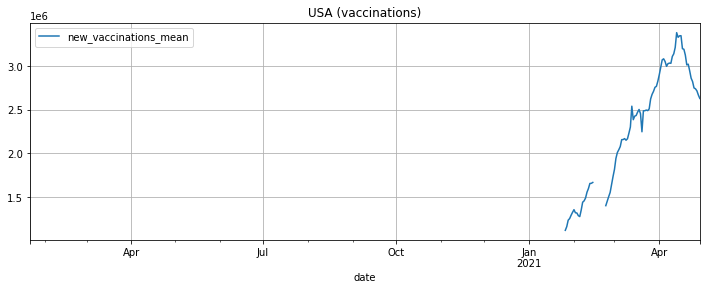

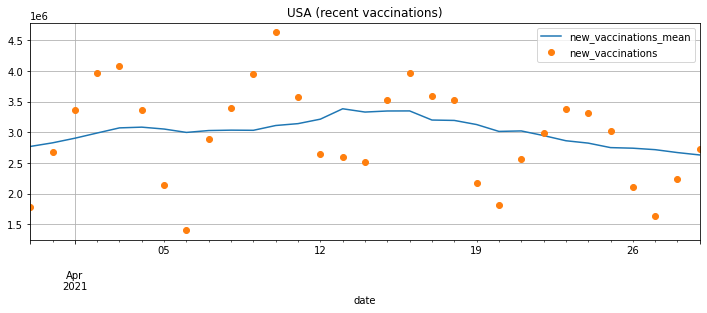

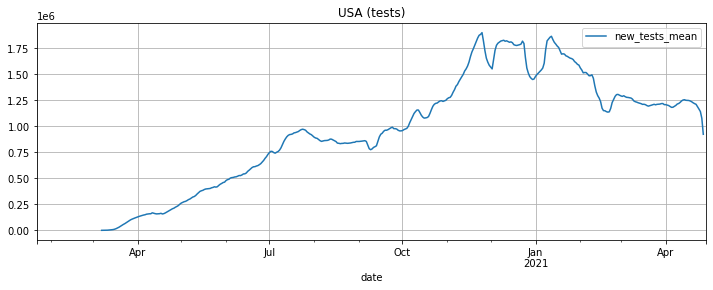

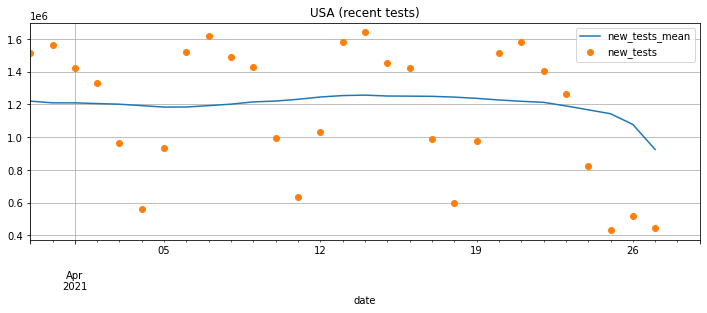

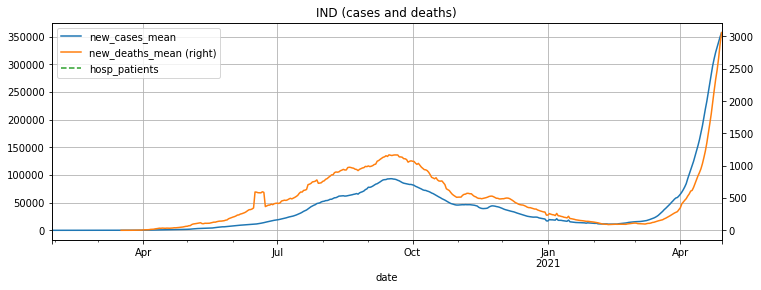

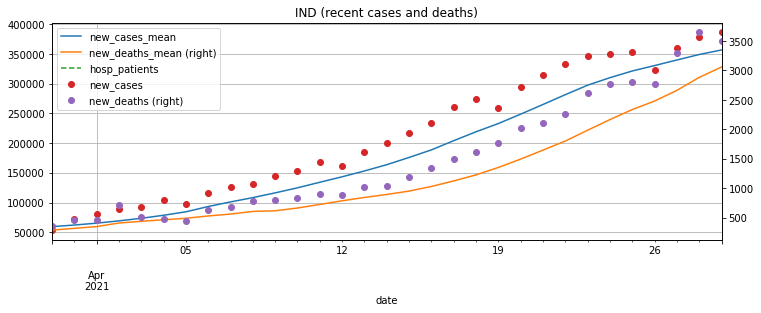

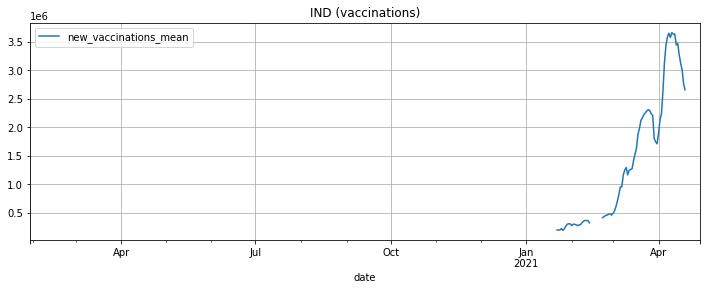

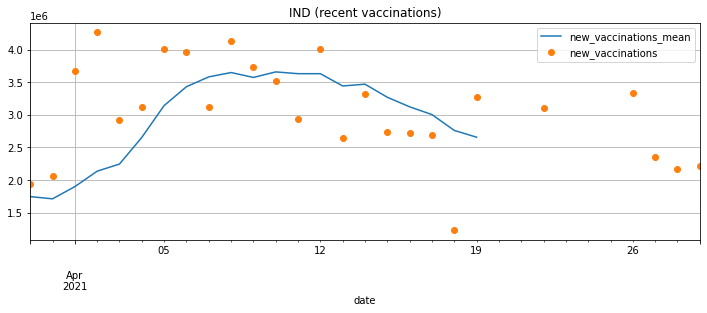

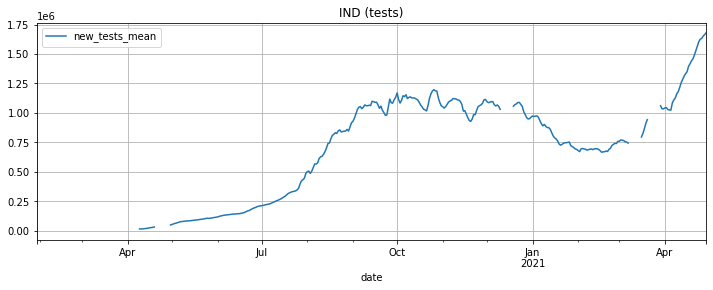

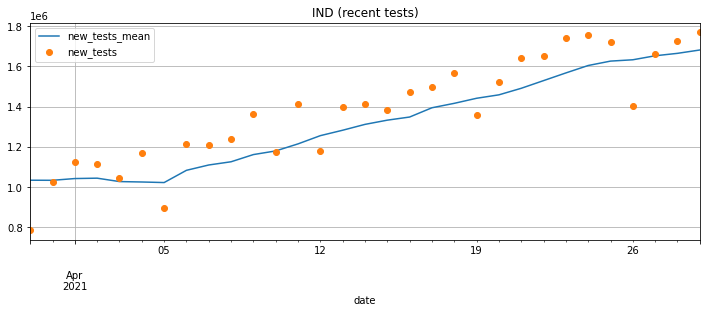

In [10]:
for country in group_one:
    plot_all(inp, iso_code=country)

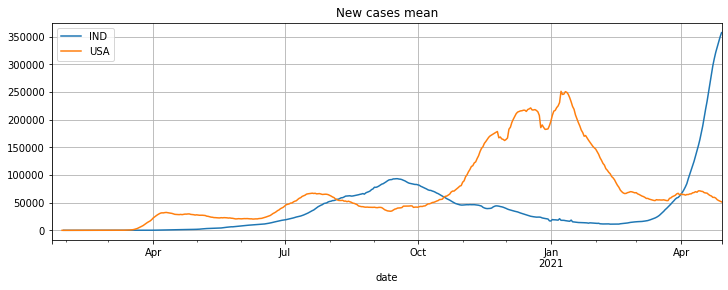

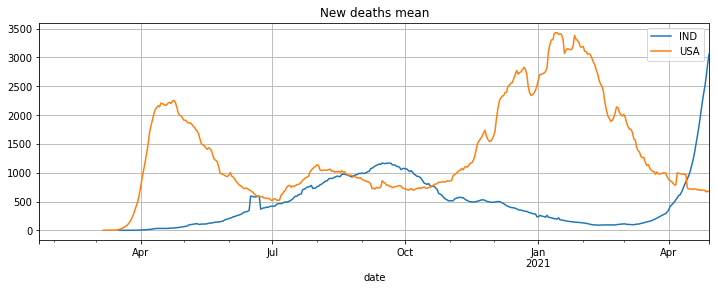

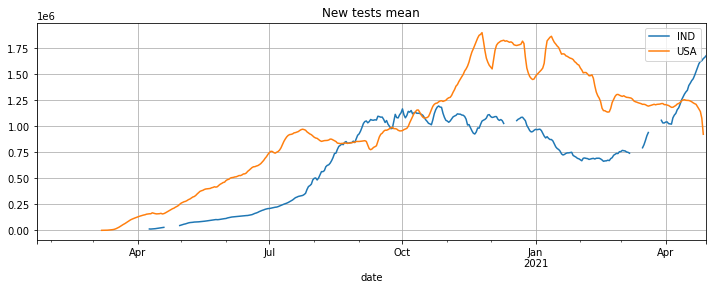

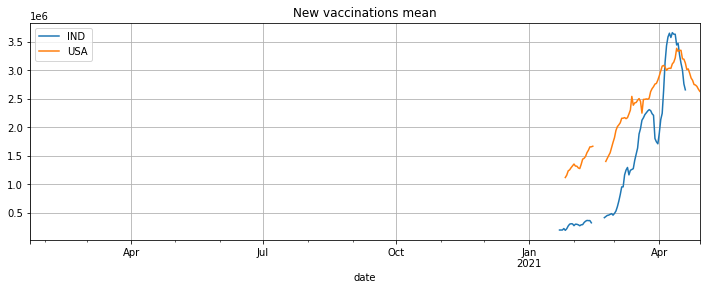

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_cases_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New cases mean')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_deaths_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New deaths mean')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_tests_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New tests mean')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_vaccinations_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New vaccinations mean')
axes.legend(list(sorted(group_one)))

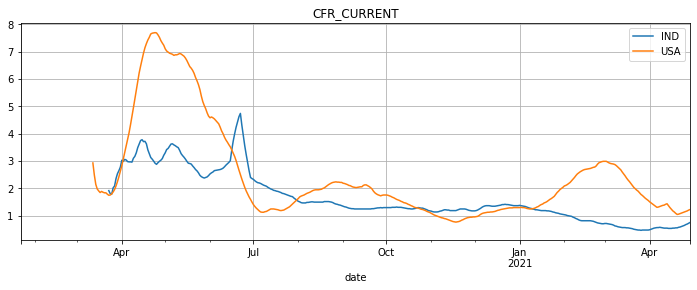

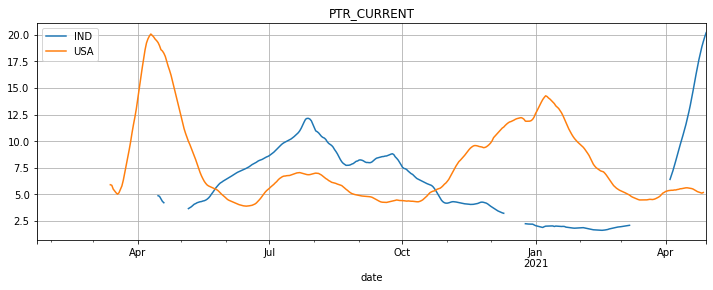

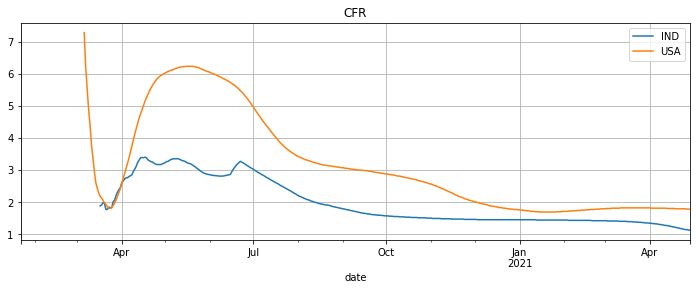

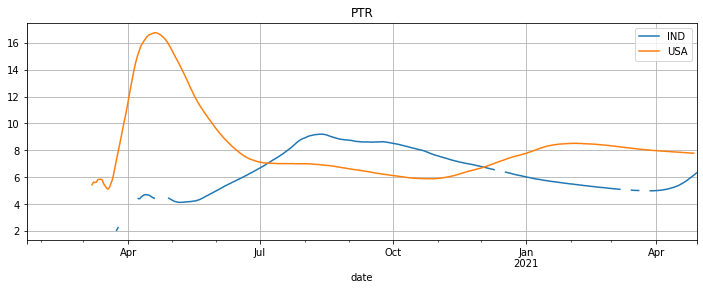

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(list(sorted(group_one)))

<AxesSubplot:title={'center':'Continents totals'}, xlabel='location'>

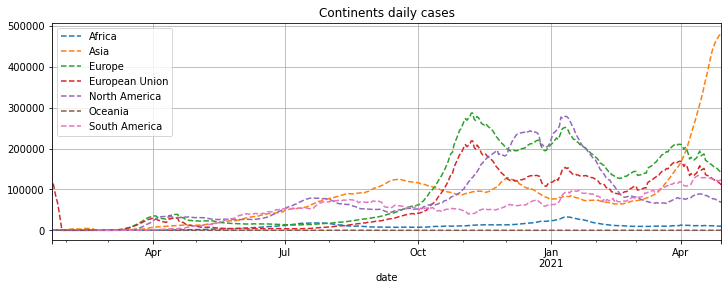

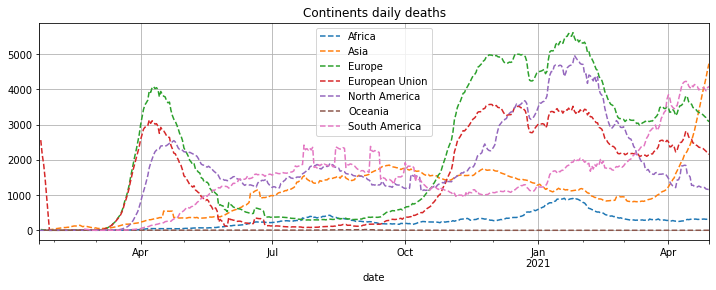

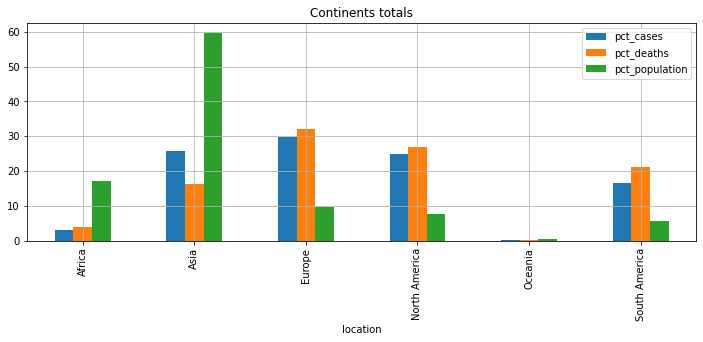

In [13]:
inp_continents = inp[inp['location'].isin(continents)]

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='new_cases_mean', style=['--'],
        figsize=fig_size, grid=True, ax=axes, title='Continents daily cases')

axes.legend(list(sorted(continents)))

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='new_deaths_mean', style=['--'],
        figsize=fig_size, grid=True, ax=axes, title='Continents daily deaths')
    
axes.legend(list(sorted(continents)))

inp_continents_current = inp_continents[(inp_continents['location'] != 'European Union') &
                                        (inp_continents['date'] == last_day)]

inp_continents_current['pct_cases'] = inp_continents_current['total_cases']*100/inp_continents_current['total_cases'].sum()
inp_continents_current['pct_deaths'] = inp_continents_current['total_deaths']*100/inp_continents_current['total_deaths'].sum()
inp_continents_current['pct_population'] = [17.2, 59.54, 9.59, 7.6, 0.55, 5.53]

inp_continents_current.plot(
    x='location', y=['pct_cases', 'pct_deaths', 'pct_population'],
    kind='bar', figsize=fig_size, grid=True, title='Continents totals')